In [1]:
import pandas as pd
import numpy as np
import requests

from datetime import timedelta, datetime

import seaborn as sns
import matplotlib.pyplot as plt

# no yelling in the library
import warnings
warnings.filterwarnings("ignore")

import acquire as a

## Exercises

The end result of this exercise should be a file named `prepare.py`.

Using your store items data:

1. Convert date column to datetime format.  
1. Plot the distribution of `sale_amount` and `item_price`.  
1. Set the index to be the datetime variable.
1. Add a 'month' and 'day of week' column to your dataframe.
1. Add a column to your dataframe, `sales_total`, which is a derived from `sale_amount` (total items) and `item_price`.  
1. Make sure all the work that you have done above is reproducible. That is, you should put the code above into separate functions and be able to re-run the functions and get the same results.

In [2]:
df = pd.read_csv('retail_df.csv')

In [3]:
df.head(2)

,Unnamed: 0,item_brand,item_id,item_name,item_price,item_upc12,item_upc14,item,sale_amount,sale_date,sale_id,store,store_address,store_city,store_id,store_state,store_zipcode
0,0,Riceland,1,Riceland American Jazmine Rice,0.84,35200264013,35200264013,1,13.0,"Tue, 01 Jan 2013 00:00:00 GMT",1,1,12125 Alamo Ranch Pkwy,San Antonio,1,TX,78253
1,1,Riceland,1,Riceland American Jazmine Rice,0.84,35200264013,35200264013,1,11.0,"Wed, 02 Jan 2013 00:00:00 GMT",2,1,12125 Alamo Ranch Pkwy,San Antonio,1,TX,78253


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 913000 entries, 0 to 912999
Data columns (total 17 columns):
 #   Column         Non-Null Count   Dtype  
---  ------         --------------   -----  
 0   Unnamed: 0     913000 non-null  int64  
 1   item_brand     913000 non-null  object 
 2   item_id        913000 non-null  int64  
 3   item_name      913000 non-null  object 
 4   item_price     913000 non-null  float64
 5   item_upc12     913000 non-null  int64  
 6   item_upc14     913000 non-null  int64  
 7   item           913000 non-null  int64  
 8   sale_amount    913000 non-null  float64
 9   sale_date      913000 non-null  object 
 10  sale_id        913000 non-null  int64  
 11  store          913000 non-null  int64  
 12  store_address  913000 non-null  object 
 13  store_city     913000 non-null  object 
 14  store_id       913000 non-null  int64  
 15  store_state    913000 non-null  object 
 16  store_zipcode  913000 non-null  int64  
dtypes: float64(2), int64(9), obje

In [5]:
df.drop(columns=['Unnamed: 0', 'item', 'store'], inplace=True)

In [6]:
# set sale_date column to datetime format
df.sale_date = pd.to_datetime(df.sale_date)

<AxesSubplot:>

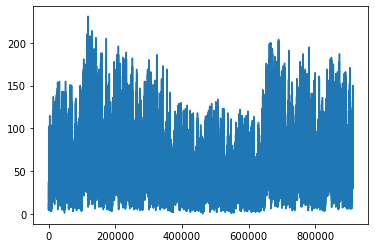

In [7]:
df.sale_amount.plot()

In [8]:
by_date = df.groupby('sale_date').sale_amount.sum().reset_index()

<AxesSubplot:xlabel='sale_date'>

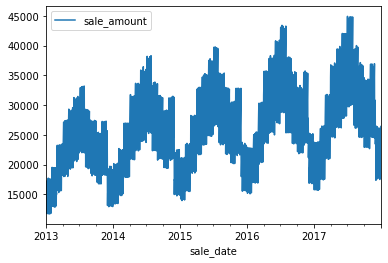

In [9]:
by_date.plot(x='sale_date', y='sale_amount')

In [10]:
# Set index
df = df.set_index('sale_date').sort_index()

In [11]:
df['month'] = df.index.month_name()

In [12]:
df['day_of_week'] = df.index.day_name()

In [13]:
df['sales_total'] = df.sale_amount * df.item_price

In [14]:
df.head()

,item_brand,item_id,item_name,item_price,item_upc12,item_upc14,sale_amount,sale_id,store_address,store_city,store_id,store_state,store_zipcode,month,day_of_week,sales_total
sale_date,,,,,,,,,,,,,,,,
2013-01-01 00:00:00+00:00,Riceland,1,Riceland American Jazmine Rice,0.84,35200264013,35200264013,13.0,1,12125 Alamo Ranch Pkwy,San Antonio,1,TX,78253,January,Tuesday,10.92
2013-01-01 00:00:00+00:00,Ducal,17,Ducal Refried Red Beans,1.16,88313590791,88313590791,26.0,295813,2118 Fredericksburg Rdj,San Antonio,3,TX,78201,January,Tuesday,30.16
2013-01-01 00:00:00+00:00,Twinings Of London,7,Twinings Of London Classics Lady Grey Tea - 20 Ct,9.64,70177154004,70177154004,32.0,125995,8503 NW Military Hwy,San Antonio,10,TX,78231,January,Tuesday,308.48
2013-01-01 00:00:00+00:00,Scotch,18,Scotch Removable Clear Mounting Squares - 35 Ct,4.39,21200725340,21200725340,45.0,314073,2118 Fredericksburg Rdj,San Antonio,3,TX,78201,January,Tuesday,197.55
2013-01-01 00:00:00+00:00,Careone,19,Careone Family Comb Set - 8 Ct,0.74,41520035646,41520035646,34.0,332333,2118 Fredericksburg Rdj,San Antonio,3,TX,78201,January,Tuesday,25.16


---

Using the OPS data acquired in the Acquire exercises `opsd_germany_daily.csv`, complete the following:

1. Convert date column to datetime format.  
1. Plot the distribution of each of your variables.  
1. Set the index to be the datetime variable.  
1. Add a month and a year column to your dataframe.
1. Fill any missing values.
1. Make sure all the work that you have done above is reproducible. That is, you should put the code above into separate functions and be able to re-run the functions and get the same results.

In [15]:
df = a.pd.read_csv('https://raw.githubusercontent.com/jenfly/opsd/master/opsd_germany_daily.csv')

In [16]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4383 entries, 0 to 4382
Data columns (total 5 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Date         4383 non-null   object 
 1   Consumption  4383 non-null   float64
 2   Wind         2920 non-null   float64
 3   Solar        2188 non-null   float64
 4   Wind+Solar   2187 non-null   float64
dtypes: float64(4), object(1)
memory usage: 171.3+ KB


In [17]:
df.head()

,Date,Consumption,Wind,Solar,Wind+Solar
0,2006-01-01,1069.184,NaN,NaN,NaN
1,2006-01-02,1380.521,NaN,NaN,NaN
2,2006-01-03,1442.533,NaN,NaN,NaN
3,2006-01-04,1457.217,NaN,NaN,NaN
4,2006-01-05,1477.131,NaN,NaN,NaN


In [18]:
df.Date= pd.to_datetime(df.Date)

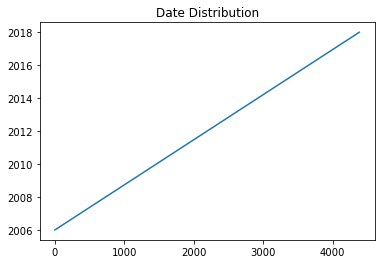

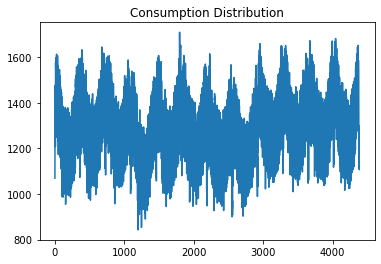

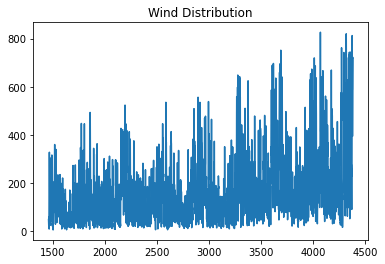

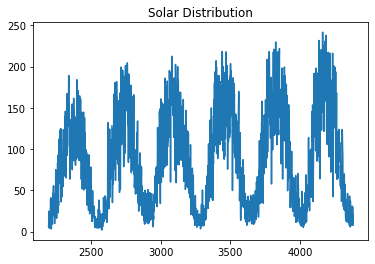

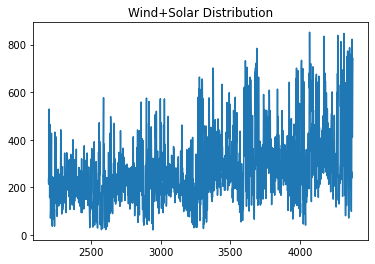

In [19]:
for col in df.columns:
    plt.title(f'{col} Distribution')
    df[col].plot()
    plt.show()

In [20]:
df = df.set_index('Date').sort_index()

In [21]:
df['year'] = df.index.year
df['month'] = df.index.month_name()

In [22]:
df.Wind

Date
2006-01-01        NaN
2006-01-02        NaN
2006-01-03        NaN
2006-01-04        NaN
2006-01-05        NaN
               ...   
2017-12-27    394.507
2017-12-28    506.424
2017-12-29    584.277
2017-12-30    721.247
2017-12-31    721.176
Name: Wind, Length: 4383, dtype: float64

Since wind and solar do not account for all energy consumption, i will fill missing values for wind and solar columns with 0. Then, I will fill missing Wind+Solar values with the total from the wind and solar columns.

In [23]:
df.Wind.fillna(0, inplace=True)
df.Solar.fillna(0, inplace=True)
df['Wind+Solar'] = df.Wind + df.Solar

In [24]:
df.sample(20)

,Consumption,Wind,Solar,Wind+Solar,year,month
Date,,,,,,
2013-03-22,1383.170,208.389,105.826,314.215,2013,March
2012-06-26,1280.592,173.629,133.302,306.931,2012,June
2012-10-21,1060.869,55.262,66.725,121.987,2012,October
2012-02-22,1453.507,287.635,74.904,362.539,2012,February
2017-04-26,1488.591,54.224,104.559,158.783,2017,April
2015-01-10,1331.448,634.675,20.477,655.152,2015,January
2009-06-10,1255.982,0.000,0.000,0.000,2009,June
2012-03-06,1433.166,61.690,83.002,144.692,2012,March
2013-10-03,1114.298,307.258,134.028,441.286,2013,October
